Opening a file

In [91]:
import uproot
file = uproot.open("uproot-tutorial-file.root")
print(file)

<ReadOnlyDirectory '/' at 0x0233957d7110>


File contents

In [92]:
file.keys()

['Events;1']

Accessing contents

In [93]:
file.classnames()

{'Events;1': 'TTree'}

Trees, Branches, and Events

Trees

In [94]:
tree = file["Events"]
print(tree)
tree.keys()

<TTree 'Events' (6 branches) at 0x0233980eb020>


['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [95]:
tree.arrays()

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

Branches

In [96]:
branches = tree.arrays()
branches["nMuon"]

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [97]:
branches["Muon_pt"]

<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

Events

In [98]:
branches["Muon_pt"][0]

<Array [10.8, 15.7] type='2 * float32'>

Exercise

In [99]:
branches["Muon_pt"][:10]

<Array [[10.8, 15.7], [10.5, ...], ..., [11.5, 3.47]] type='10 * var * float32'>

In [100]:
branches[0]

<Record {nMuon: 2, Muon_pt: [...], ...} type='{nMuon: uint32, Muon_pt: var ...'>

In [101]:
branches[0].tolist()

{'nMuon': 2,
 'Muon_pt': [10.763696670532227, 15.736522674560547],
 'Muon_eta': [1.0668272972106934, -0.563786506652832],
 'Muon_phi': [-0.03427272289991379, 2.5426154136657715],
 'Muon_mass': [0.10565836727619171, 0.10565836727619171],
 'Muon_charge': [-1, -1]}

Histograms

Histogramming basics

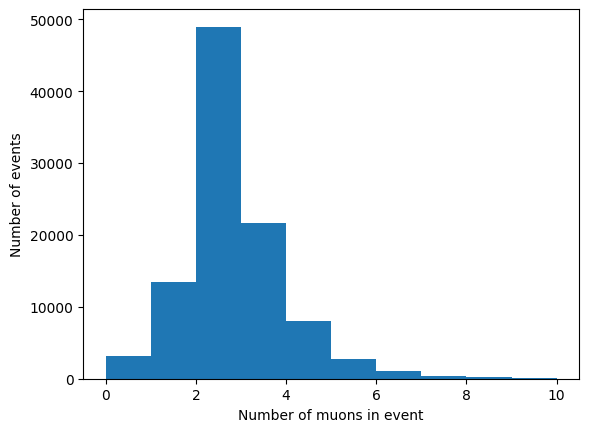

In [102]:
import matplotlib.pyplot as plt
plt.hist(branches["nMuon"], bins = 10, range = (0, 10))
plt.xlabel("Number of muons in event")
plt.ylabel("Number of events")
plt.show()

Bining and range

In [103]:
import numpy as np

np.mean(branches["nMuon"])
np.std(branches["nMuon"])
np.min(branches["nMuon"])
np.max(branches["nMuon"])

39

Histogramming a jagged array

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\4011799308.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Muon $p_{\mathrm{T}}$ [Gev]")


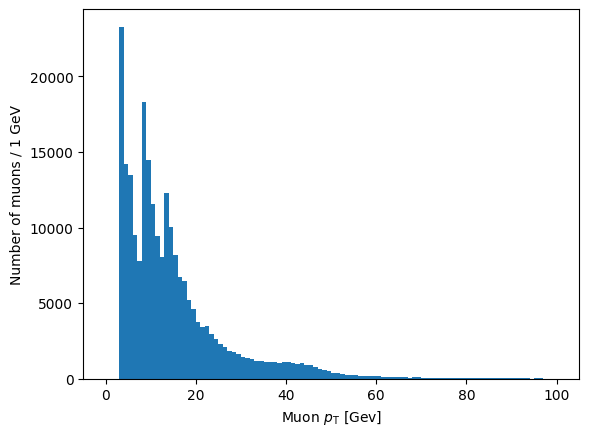

In [119]:
import awkward as ak

plt.hist(ak.flatten(branches["Muon_pt"]), bins = 100, range = (0, 100))
plt.xlabel("Muon $p_{\mathrm{T}}$ [Gev]")
# plt.xscale("log")
plt.ylabel("Number of muons / 1 GeV")
# plt.yscale("log")
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\399851690.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Muon $p_{\mathrm{T}}$ [Gev]")


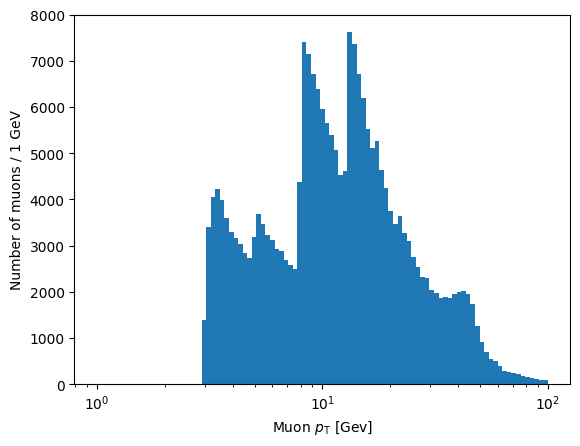

In [105]:
import awkward as ak

plt.hist(ak.flatten(branches["Muon_pt"]), bins = np.logspace(np.log10(1), np.log10(100), 100))
plt.xlabel("Muon $p_{\mathrm{T}}$ [Gev]")
plt.xscale("log")
plt.ylabel("Number of muons / 1 GeV")
# plt.yscale("log")
plt.show()

Exercise

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\2645354584.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("Muon $\eta$")


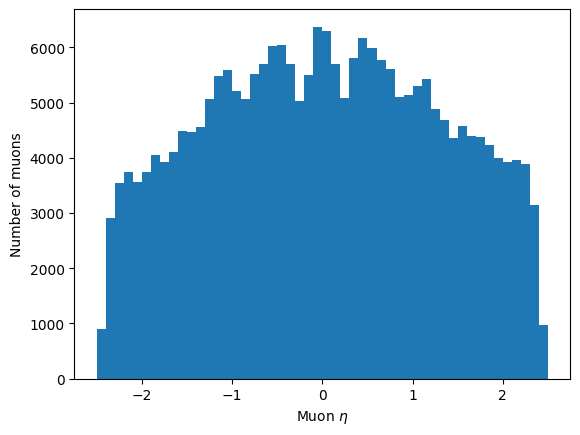

In [106]:
import matplotlib.pyplot as plt
import awkward as ak

plt.hist(ak.flatten(branches["Muon_eta"]), bins = 50, range = (-2.5, 2.5))
plt.xlabel("Muon $\eta$")
plt.ylabel("Number of muons")
plt.show()

Columnar Analysis

Counting

In [107]:
len(branches)
len(branches["nMuon"])
len(branches["Muon_pt"])

100000

Exercise

In [108]:
len(ak.flatten(branches["Muon_pt"]))
# sum(branches["nMuon"])

235286

Selections from 1D arrays

In [109]:
single_muon_mask = branches["nMuon"] == 1

Counting with selections

In [114]:
np.sum(single_muon_mask)

13447

In [115]:
branches["Muon_pt"][single_muon_mask]

<Array [[3.28], [3.84], ..., [13.3], [9.48]] type='13447 * var * float32'>

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\4106083683.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Muon $p_{\mathrm{T}}$ [GeV]")


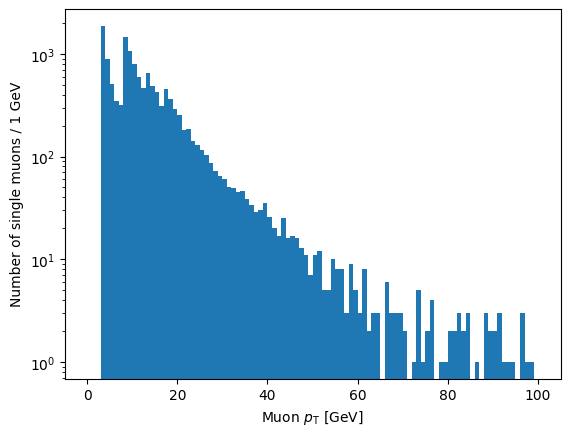

In [118]:
plt.hist(branches["Muon_pt"][single_muon_mask], bins = 100, range = (0, 100))
plt.xlabel("Muon $p_{\mathrm{T}}$ [GeV]")
plt.ylabel("Number of single muons / 1 GeV")
plt.yscale("log")
plt.show()

Selections from a jagged array

In [121]:
eta_mask = abs(branches["Muon_eta"]) < 2
print(eta_mask)

[[True, True], [True, True], [False], ..., [True, True], [True, True, True]]


Comparing histograms

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\3646015806.py:3: SyntaxWarning: invalid escape sequence '\e'
  label = ["$|\eta| < 2$", "$|\eta| \geq 2$"], bins = 25, range = (0, 50), density = True)
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\3646015806.py:3: SyntaxWarning: invalid escape sequence '\e'
  label = ["$|\eta| < 2$", "$|\eta| \geq 2$"], bins = 25, range = (0, 50), density = True)
C:\Users\황시연\AppData\Local\Temp\ipykernel_33268\3646015806.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Muon $p_{\mathrm{T}}$ [GeV]")


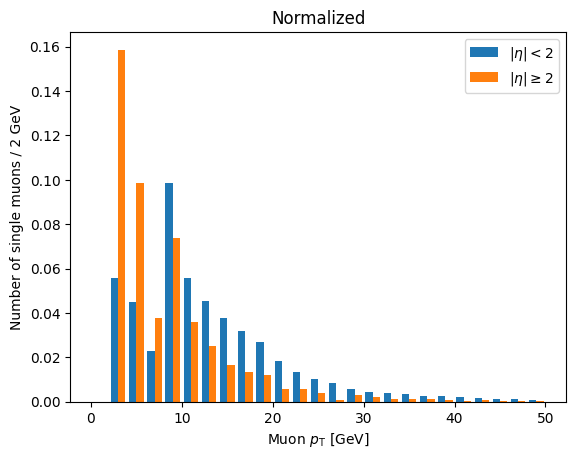

In [127]:
plt.hist([ak.flatten(branches["Muon_pt"][single_muon_mask & eta_mask]), \
          ak.flatten(branches["Muon_pt"][single_muon_mask & ~eta_mask])], \
          label = ["$|\eta| < 2$", "$|\eta| \geq 2$"], bins = 25, range = (0, 50), density = True)
plt.title("Normalized")
plt.xlabel("Muon $p_{\mathrm{T}}$ [GeV]")
plt.ylabel("Number of single muons / 2 GeV")
plt.legend()
plt.show()
                                                                                   

In [128]:
eta_count = 0

for event in branches["Muon_eta"]:
    for eta in event:
        if abs(eta) < 2:
            eta_count = eta_count + 1
print(eta_count)

204564
